# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [117]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
 
import urllib 
# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)




## Generate Cities List

In [118]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    if city not in cities:
        cities.append(city)
        
len(cities)



643

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

In [119]:
#setup API key & URL
API_key = "b409ad4d6805f8d8fbfd35dd15250d09"

URL = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID="+ API_key

In [121]:
city_data = []

record_count = 1
set_count = 1


for i, city in enumerate(cities):
        
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    city_url = URL + "&q=" + urllib.request.pathname2url(city)


    record_count += 1

    #Run API data fro cities 
    try:
        city_weather = requests.get(city_url).json()

        
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        #create appends for Citydata
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    #Error values = no entry 
    except:
        print("No Entry")
        pass
              


No Entry
No Entry
No Entry
No Entry
No Entry
No Entry
No Entry
No Entry
No Entry
No Entry
No Entry
No Entry
No Entry
No Entry
No Entry
No Entry
No Entry
No Entry
No Entry
No Entry
No Entry
No Entry
No Entry
No Entry
No Entry
No Entry
No Entry
No Entry
No Entry
No Entry
No Entry
No Entry
No Entry
No Entry
No Entry
No Entry
No Entry
No Entry
No Entry
No Entry
No Entry
No Entry
No Entry
No Entry
No Entry
No Entry
No Entry
No Entry
No Entry
No Entry
No Entry
No Entry
No Entry
No Entry
No Entry
No Entry
No Entry
No Entry
No Entry
No Entry
No Entry
No Entry
No Entry
No Entry
No Entry
No Entry
No Entry
No Entry
No Entry
No Entry
No Entry
No Entry
No Entry


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [122]:
# Convert into DataFrame Make sure "" are capitalized 
city_data_pd = pd.DataFrame(city_data)


lats = city_data_pd["Lat"]
max_temps = city_data_pd["Max Temp"]
humidity = city_data_pd["Humidity"]
cloudiness = city_data_pd["Cloudiness"]
wind_speed = city_data_pd["Wind Speed"]

city_data_pd.count()

City          570
Cloudiness    570
Country       570
Date          570
Humidity      570
Lat           570
Lng           570
Max Temp      570
Wind Speed    570
dtype: int64

In [123]:
city_data_pd.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,esperance,20,TT,1541397600,94,10.24,-61.45,75.20,4.61
1,albany,75,US,1541397240,81,42.65,-73.75,39.02,5.01
2,rikitea,0,PF,1541400095,99,-23.12,-134.97,74.35,17.69
3,castro,88,CL,1541399963,87,-42.48,-73.76,46.85,11.32
4,alice springs,40,AU,1541397600,57,-23.70,133.88,80.60,5.82


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

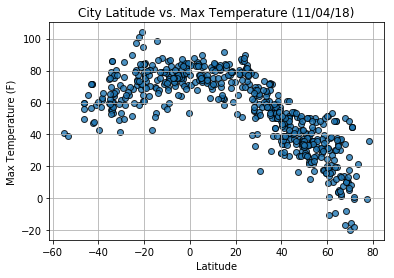

In [132]:
plt.scatter(lats, max_temps,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

#Graph Properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.show()

#### Latitude vs. Humidity Plot

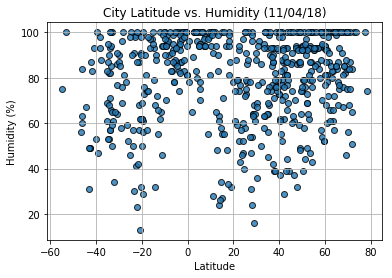

In [131]:
plt.scatter(lats, 
            humidity,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

#Graph Properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.show()

#### Latitude vs. Cloudiness Plot

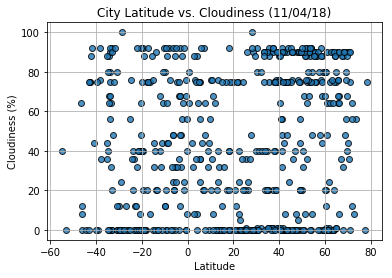

In [130]:
plt.scatter(lats, 
            cloudiness,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

#Graph Properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.show()


#### Latitude vs. Wind Speed Plot

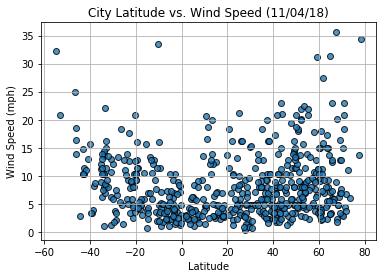

In [129]:
plt.scatter(lats, 
            wind_speed,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

#Graph Properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.show()